In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
import torch

import sys
sys.path.insert(0, '../fem')
from heatconduction2d import main, postprocessdata, datasetgenerator
from randompolynomials import *
from GRF import GRF

sys.path.insert(0, '../ml')
from modelloader import loadmodelfromlabel
from VarMiON import VarMiON

In [3]:
simparams = {'d': 2,
             'nelems': 32,
             'etype': 'square',
             'btype': 'spline',
             'basisdegree': 1,
             'intdegree': 2,
             'nfemsamples': 2}

p_theta = {'l': 0.4,
        'lowerbound': 0.02,
        'upperbound': 0.99}

p_f = {'l': 0.2,
        'lowerbound': 0.02,
        'upperbound': 0.99}

p_eta = {'l': 0.3,
        'lowerbound': -1,
        'upperbound': 1}

trainingdataparams = {'inputdata': 'grf',
                   'theta': p_theta,
                   'f': p_f,
                   'eta': p_eta,
                   'N_sensornodes': 144,
                   'N_outputnodes': 268,
                   'N_samples': 10000}

params = {}
params['trainingdataparams'] = trainingdataparams
params['simparams'] = simparams

# C = 0.2
# c_theta = C*np.random.uniform(-1, 1, 10)
# c_f = C*np.random.uniform(-1, 1, 10)
# c_etab = C*np.random.uniform(-1, 1, 4)
# c_etat = C*np.random.uniform(-1, 1, 4)
# theta = randompoly2DO3sqr(c_theta)
# f = randompoly2DO3sqr(c_f)
# etab = randompoly1DO3(c_etab)
# etat = randompoly1DO3(c_etat)
# gl = 0
# gr = 0

theta_in = GRF(**simparams, **trainingdataparams, **trainingdataparams['theta'])
f_in = GRF(**simparams, **trainingdataparams, **trainingdataparams['f'])
etab_in = GRF(**simparams, **trainingdataparams, **trainingdataparams['eta'])
etat_in = GRF(**simparams, **trainingdataparams, **trainingdataparams['eta'])
gl_in = 0
gr_in = 0

In [136]:
inputs = {'theta': theta_in,
          'f': f_in,
          'etab': etab_in,
          'etat': etat_in,
          'gl': gl_in,
          'gr': gr_in}

sample = 1
outputs = main(params, inputs, sample, save=False, savedir='../../../trainingdata', label='test')
# generatedataset(params, save=True, savedir='../../../trainingdata', label='test')

optimize > constrained 66/1089 dofs
optimize > optimum value 0.00e+00
solve > solving 1023 dof system to machine precision using arnoldi solver
solve > solver returned with residual 2e-16


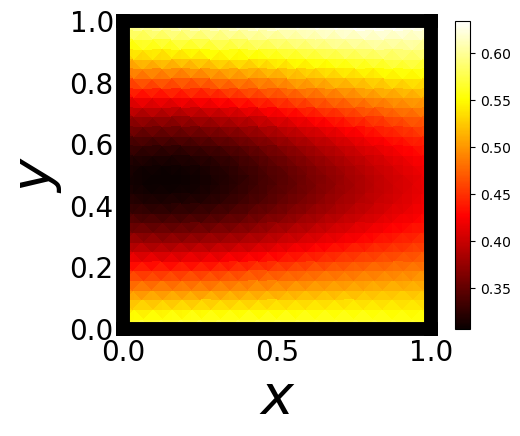

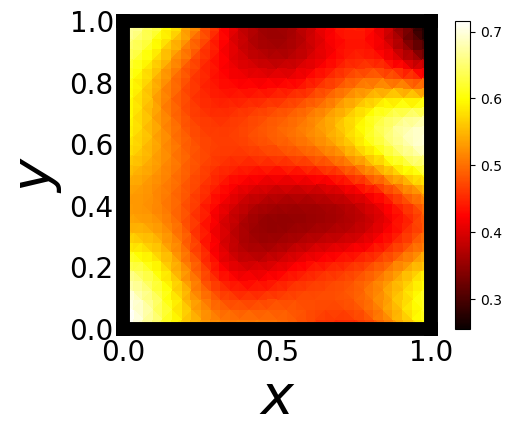

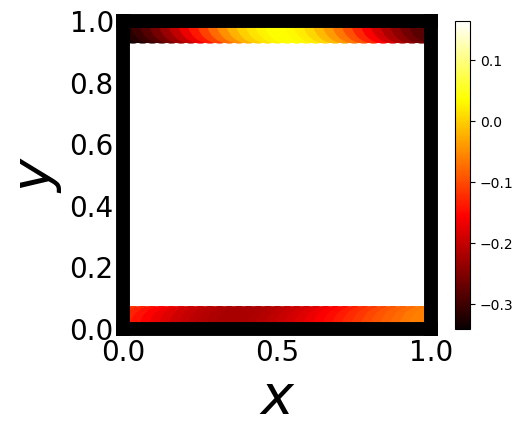

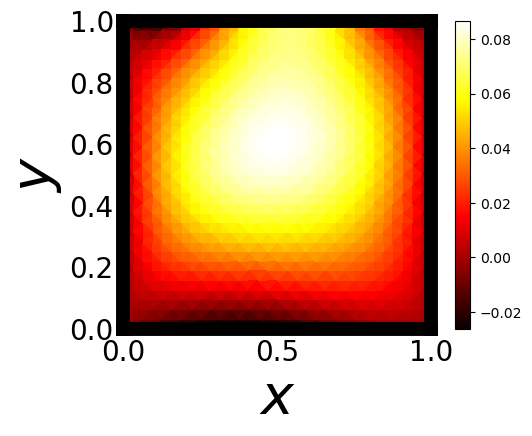

In [137]:
x = outputs['x']
u = outputs['u']
f = outputs['f']
theta = outputs['theta']
etab = outputs['etab']
etat = outputs['etat']

size_title = 25
size_ticklabels = 20
size_axeslabels = 40
box_lw = 10

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], theta, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("theta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], f, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("f.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

vmin = min(np.amin(etab),np.amin(etat))
vmax = max(np.amax(etab),np.amax(etat))
fig = ax.scatter(x[x[:,1]==0,0], x[x[:,1]==0,1], c=etab[x[:,1]==0], label=r'$\eta_\mathrm{bottom}(x)$', s=1000, cmap='hot', vmin=vmin, vmax=vmax)
fig = ax.scatter(x[x[:,1]==1,0], x[x[:,1]==1,1], c=etat[x[:,1]==1], label=r'$\eta_\mathrm{top}(x)$', s=1000, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$\eta(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.legend(fontsize=20)
ax.set_box_aspect(1)
plt.colorbar(fig)
# ax.grid()

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("eta.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.tripcolor(x[:,0], x[:,1], u, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)

plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1);

plt.savefig("u.svg", bbox_inches='tight', transparent=True)

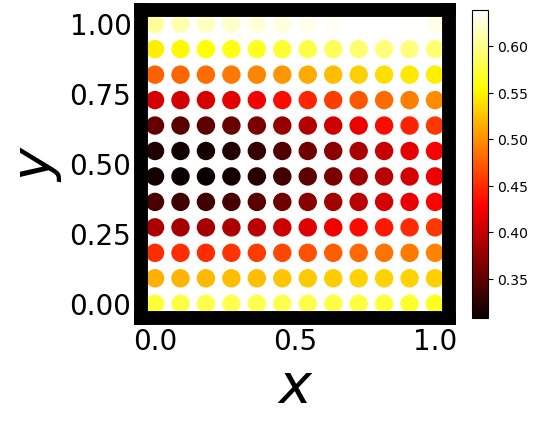

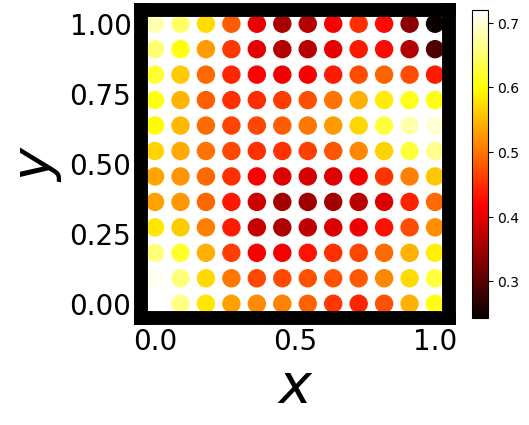

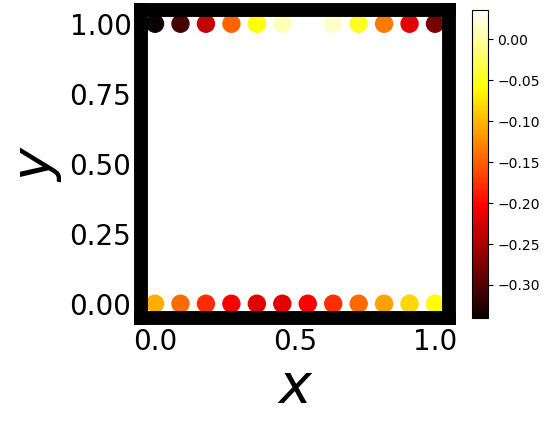

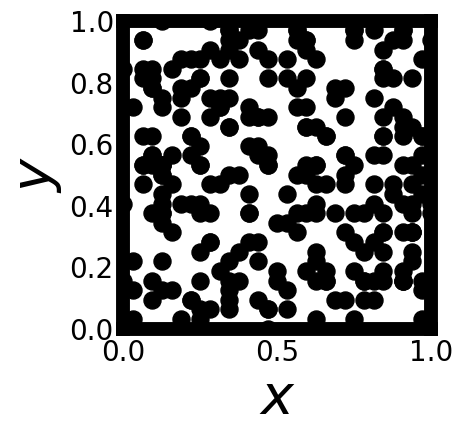

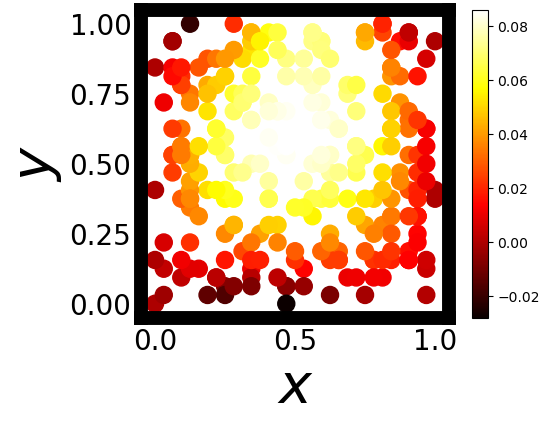

In [145]:
data_postprocessed = postprocessdata(params, inputs, sample, outputs)
Theta = data_postprocessed['Theta']
F = data_postprocessed['F']
N = data_postprocessed['N']
x = data_postprocessed['x']
u = data_postprocessed['u']

x_sensor, y_sensor = np.mgrid[0:1:np.sqrt(trainingdataparams['N_sensornodes'])*1j, 0:1:np.sqrt(trainingdataparams['N_sensornodes'])*1j]

size_title = 25
size_ticklabels = 20
size_axeslabels = 40
box_lw = 10
markersize = 150

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.scatter(x_sensor, y_sensor, c=Theta.flatten(), s=markersize, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("Theta_pp.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.scatter(x_sensor, y_sensor, c=F.flatten(), s=markersize, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("f_pp.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot2 = ax.scatter(x_sensor[N!=0], y_sensor[N!=0], c=N[N!=0].flatten(), s=markersize, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
fig.colorbar(plot2, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("eta_pp.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.scatter(x[:,0], x[:,1], color='black', s=150)#, c=u, cmap='hot')
# ax.set_title(r"$u^h_{jl}=u^h_j(\mathbf{x}_l)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("x.svg", bbox_inches='tight', transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

plot0 = ax.scatter(x[:,0], x[:,1], c=u.flatten(), s=markersize, cmap='hot')
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
fig.colorbar(plot0, ax=ax)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("u_out.svg", bbox_inches='tight', transparent=True)

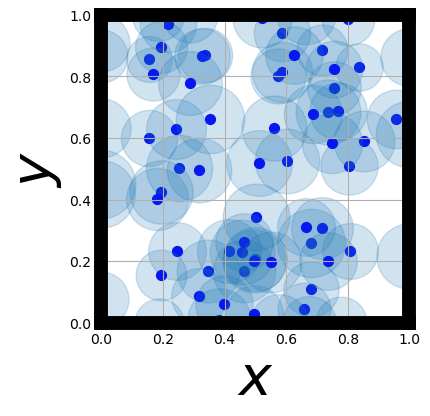

In [163]:
size_title = 25
size_ticklabels = 10
size_axeslabels = 40

from VarMiON import VarMiON
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'
model = loadmodelfromlabel(model=VarMiON, label='allchanges_new', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

mus = model.Trunk.mus.detach().numpy()
sigmas = torch.exp(model.Trunk.log_sigmas).detach().numpy()

# plt.savefig("phis_boundedcenters.svg", bbox_inches='tight')#, transparent=True)


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

for i in range(72):
    ax.scatter(mus[i,0], mus[i,1], s=50, alpha=1, color='blue')
    ax.scatter(mus[i,0], mus[i,1], s=10000*sigmas[i], alpha=0.2, color='C0')
# ax.set_title(r"$\hat{\Theta}_j=\theta(\mathbf{x}_j)$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_aspect('equal')
# ax.set_xlim(-0.5,1.5)
# ax.set_ylim(-0.5,1.5)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.grid()
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("basisfunctions.svg", bbox_inches='tight', transparent=True)

0.19363535184688893
0.11430720573917925
0.048599213170829304


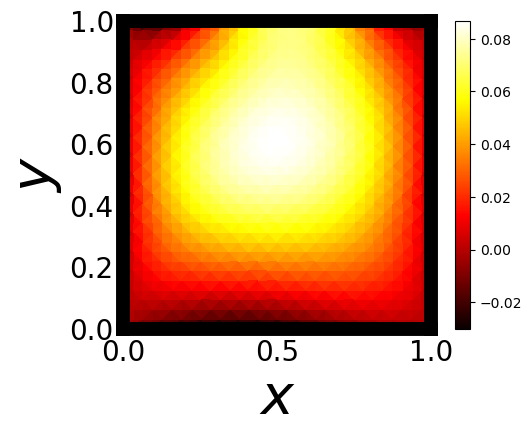

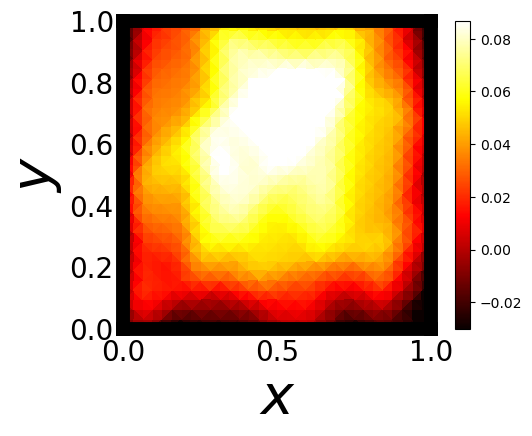

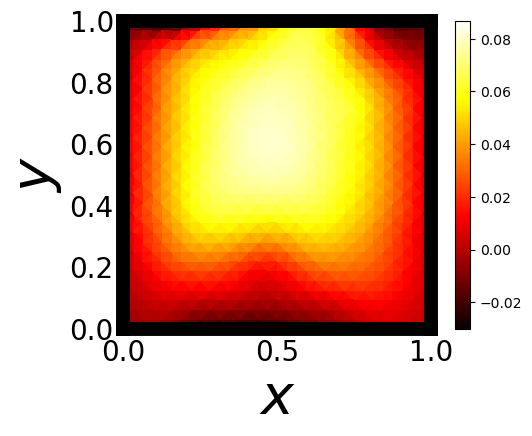

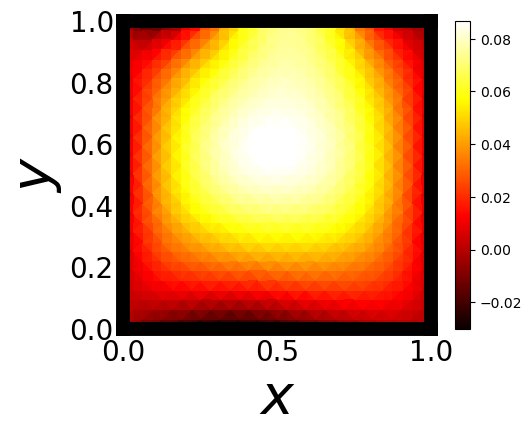

In [166]:
x = outputs['x']
u = outputs['u']
# u_hat = model.simforward(Theta, F, N, x)
# u_hat = model.simforward(Theta, F, N, x).detach().numpy()

vmin = np.amin(u)
vmax = np.amax(u)

#plot
size_title = 40
size_ticklabels = 20
size_axeslabels = 40
box_lw = 10
markersize = 150


fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$u(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("u.svg", bbox_inches='tight', transparent=True)


from RegularNN import RegularNN
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'
model = loadmodelfromlabel(model=RegularNN, label='RegularNN', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
u_hat = model.simforward(Theta, F, N, x).detach().numpy()

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u_hat, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$u^{\mathrm{pred}}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("u_naiveNN.svg", bbox_inches='tight', transparent=True)

L2 = np.average(np.sqrt((u_hat - u)**2))
L2_scaled = L2/np.average(np.sqrt(u**2))
print(L2_scaled)

from VarMiON import VarMiON
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'
model = loadmodelfromlabel(model=VarMiON, label='VarMiON', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
u_hat = model.simforward(Theta, F, N, x)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u_hat, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$u^{\mathrm{pred}}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("u_VarMiON.svg", bbox_inches='tight', transparent=True)

L2 = np.average(np.sqrt((u_hat - u)**2))
L2_scaled = L2/np.average(np.sqrt(u**2))
print(L2_scaled)


from VarMiON import VarMiON
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'
model = loadmodelfromlabel(model=VarMiON, label='allchanges', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
u_hat = model.simforward(Theta, F, N, x)

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

fig = ax.tripcolor(x[:,0], x[:,1], u_hat, cmap='hot', vmin=vmin, vmax=vmax)
# ax.set_title(r"$u^{\mathrm{pred}}(\mathbf{x})$", fontsize=size_title)
ax.tick_params(axis='both', labelsize=size_ticklabels)
ax.ticklabel_format(style='sci', scilimits=[-3,3])
ax.set_xlabel(r'$x$', fontsize=size_axeslabels)
ax.set_ylabel(r'$y$', fontsize=size_axeslabels)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_aspect('equal')
plt.colorbar(fig)
plt.setp(ax.spines.values(), lw=box_lw, color='black', alpha=1)

plt.savefig("u_extendedVarMiON.svg", bbox_inches='tight', transparent=True)

L2 = np.average(np.sqrt((u_hat - u)**2))
L2_scaled = L2/np.average(np.sqrt(u**2))
print(L2_scaled)

In [154]:
#Test dataset
N_samples = 1000
Theta_test = torch.tensor(np.load('../../../trainingdata/grf/test/Theta.npy'))[:N_samples]
F_test = torch.tensor(np.load('../../../trainingdata/grf/test/F.npy'))[:N_samples]
N_test = torch.tensor(np.load('../../../trainingdata/grf/test/N.npy'))[:N_samples]
x_test = torch.tensor(np.load('../../../trainingdata/grf/test/x.npy'))[:N_samples]
u_test = torch.tensor(np.load('../../../trainingdata/grf/test/u.npy'))[:N_samples]

In [157]:
from VarMiON import VarMiON
from RegularNN import RegularNN

model = VarMiON
logdir = '../../../nnlogs'
sublogdir = 'grf'
map_location = 'cpu'


allchanges = loadmodelfromlabel(model=model, label='allchanges', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
VarMiON = loadmodelfromlabel(model=model, label='VarMiON', logdir=logdir, sublogdir=sublogdir, map_location=map_location)
RegularNN = loadmodelfromlabel(model=RegularNN, label='RegularNN', logdir=logdir, sublogdir=sublogdir, map_location=map_location)

modeldict = {'Naive NN': RegularNN,
             'VarMiON': VarMiON,
             'Extended VarMiON': allchanges}

204
830
606


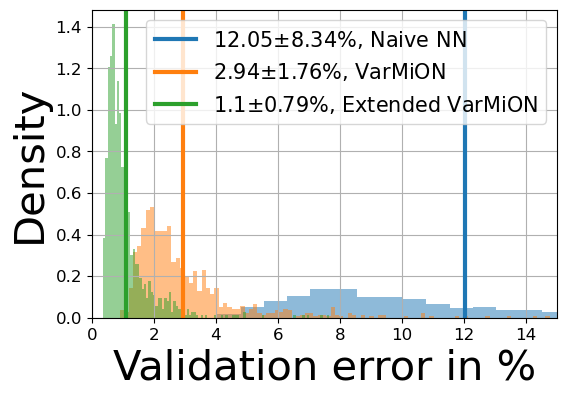

In [165]:
size_title = 20
size_ticklabels = 12
size_axeslabels = 30

fig, ax = plt.subplots(1,1, figsize=(6, 4))
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.4, hspace=0.4)

colors = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','C10']

i=0
for model in modeldict:
    u_hat = modeldict[str(model)].forward(Theta_test, F_test, N_test, x_test).detach().numpy()
    L2 = np.average(np.sqrt((u_hat - u_test.detach().numpy())**2), axis=-1)
    L2_scaled = L2/np.average(np.sqrt((u_test.detach().numpy())**2), axis=-1)
    # APE[np.abs(u_test)<1e-4] = np.nan
    # MAPE = np.nanmean(APE, axis=-1)
    L2_scaled_avg = np.average(L2_scaled)
    print(np.argmax(L2_scaled))
    sigma = np.std(L2_scaled)
    ax.hist(100*L2_scaled, bins=100, density=True, alpha=0.5, linewidth=1, color=colors[i], histtype='bar')
    ax.axvline(100*L2_scaled_avg, 0, 1, linewidth=3, color=colors[i], label=str(np.around(100*L2_scaled_avg, 2))+r'$\pm$'+str(np.around(100*sigma, 2))+'%, '+str(model))
    i+=1
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlim(0,15)
ax.legend(fontsize=15)
ax.tick_params(axis='both', labelsize=size_ticklabels)
# ax.ticklabel_format(style='sci', scilimits=[-3,3])
# ax.set_xlabel(r'$\langle|(\hat{u} - u^h)/u^h|\rangle$', fontsize=size_axeslabels)
ax.set_xlabel(r'Validation error in %', fontsize=size_axeslabels)
ax.set_ylabel(r'Density', fontsize=size_axeslabels)
ax.grid()
plt.savefig("errors.svg", bbox_inches='tight', transparent=True)